In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import datetime

def strptime_date(df,pattern='%Y-%m-%d %H:%M:%S'):
    return [datetime.datetime.strptime(df[i], pattern) for i in range(len(df))]

marged_df=pd.read_csv('/content/drive/MyDrive/signate/シェアサイクルの利用予測/marged_df.csv',parse_dates=["date","installation_date"])
marged_df["date"]=strptime_date(marged_df["date"])
marged_df["installation_date"]=strptime_date(marged_df["installation_date"])
#marged_df["diff"]=marged_df["return_num"]-marged_df["rent_num"]
#marged_df["weekday"]=[marged_df.loc[i,"date"].weekday() for i in range(len(marged_df))]
marged_df.head()

,id,year,month,day,hour,station_id,bikes_available,predict,date,rent_num,...,lat,long,dock_count,city,installation_date,is_install,diff,weekday,pred_diff,pred_bikes_available
0,0.0,2013.0,9.0,1.0,0.0,0.0,11.0,0.0,2013-09-01 00:00:00,0.0,...,37.32973,-121.90178,27,city1,2013-08-06,True,0.0,6,NaN,11.0
1,1.0,2013.0,9.0,1.0,1.0,0.0,11.0,0.0,2013-09-01 01:00:00,0.0,...,37.32973,-121.90178,27,city1,2013-08-06,True,0.0,6,NaN,11.0
2,2.0,2013.0,9.0,1.0,2.0,0.0,11.0,0.0,2013-09-01 02:00:00,0.0,...,37.32973,-121.90178,27,city1,2013-08-06,True,0.0,6,NaN,11.0
3,3.0,2013.0,9.0,1.0,3.0,0.0,11.0,0.0,2013-09-01 03:00:00,0.0,...,37.32973,-121.90178,27,city1,2013-08-06,True,0.0,6,NaN,11.0
4,4.0,2013.0,9.0,1.0,4.0,0.0,11.0,0.0,2013-09-01 04:00:00,0.0,...,37.32973,-121.90178,27,city1,2013-08-06,True,0.0,6,NaN,11.0


In [14]:
marged_df.loc[(marged_df["is_install"]==False),:]
#最も遅いstationの導入日は2014/4/9　predictの開始は9/1なので4か月は最低でも使える

,id,year,month,day,hour,station_id,bikes_available,predict,date,rent_num,...,dock_count,city,installation_date,is_install,diff,weekday,pred_diff,pred_bikes_available,pred_diff2,pred_bikes_available2
420480,420480.0,2013.0,9.0,1.0,0.0,24.0,0.0,0.0,2013-09-01 00:00:00,0.0,...,15,city4,2013-12-31,False,0.0,6,NaN,0.0,NaN,0.0
420481,420481.0,2013.0,9.0,1.0,1.0,24.0,0.0,0.0,2013-09-01 01:00:00,0.0,...,15,city4,2013-12-31,False,0.0,6,NaN,0.0,NaN,0.0
420482,420482.0,2013.0,9.0,1.0,2.0,24.0,0.0,0.0,2013-09-01 02:00:00,0.0,...,15,city4,2013-12-31,False,0.0,6,NaN,0.0,NaN,0.0
420483,420483.0,2013.0,9.0,1.0,3.0,24.0,0.0,0.0,2013-09-01 03:00:00,0.0,...,15,city4,2013-12-31,False,0.0,6,NaN,0.0,NaN,0.0
420484,420484.0,2013.0,9.0,1.0,4.0,24.0,0.0,0.0,2013-09-01 04:00:00,0.0,...,15,city4,2013-12-31,False,0.0,6,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214155,1214155.0,2014.0,4.0,8.0,19.0,69.0,0.0,0.0,2014-04-08 19:00:00,0.0,...,15,city1,2014-04-09,False,0.0,1,NaN,0.0,NaN,0.0
1214156,1214156.0,2014.0,4.0,8.0,20.0,69.0,0.0,0.0,2014-04-08 20:00:00,0.0,...,15,city1,2014-04-09,False,0.0,1,NaN,0.0,NaN,0.0
1214157,1214157.0,2014.0,4.0,8.0,21.0,69.0,0.0,0.0,2014-04-08 21:00:00,0.0,...,15,city1,2014-04-09,False,0.0,1,NaN,0.0,NaN,0.0
1214158,1214158.0,2014.0,4.0,8.0,22.0,69.0,0.0,0.0,2014-04-08 22:00:00,0.0,...,15,city1,2014-04-09,False,0.0,1,NaN,0.0,NaN,0.0


In [3]:
station_num=70
dfs=[0]*station_num
for i in range(station_num):
    dfs[i]=[marged_df.loc[(marged_df["station_id"]==i)&(marged_df["is_install"]==True)&(marged_df["hour"]==j),:].reset_index(drop=True) for j in range(24)]
    

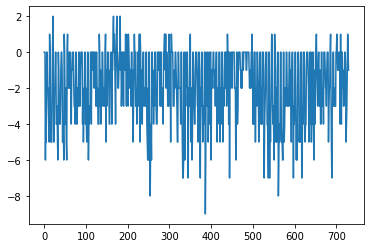

In [13]:
import matplotlib.pyplot as plt

plt.plot(dfs[0][8]["diff"])
plt.show()

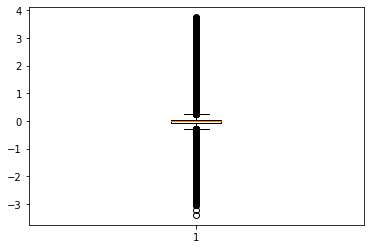

In [12]:

import matplotlib.pyplot as plt

plt.boxplot(predict_df["pred_diff"])
plt.show()

In [5]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import lightgbm as lgb

from sklearn.model_selection import train_test_split
import numpy as np
def get_data(dfs,station,hour):
    margin=4*7
    tmp=dfs[station][hour]
    X=[]
    Y=[]
    for i in range(len(tmp)-margin):
        rows=tmp.loc[i:i+margin,:]
        if rows.iloc[-1]["predict"]==0:
            x=np.ravel(rows.iloc[0:-1][["bikes_available","weather1","weather2","diff","weekday"]].values.transpose())
            
            #x=rows.iloc[0:-1]["bikes_available"].values
            y=rows.iloc[-1]["bikes_available"]
            X.append(x)
            Y.append(y)
    train_x,test_x,train_y,test_y=train_test_split(np.array(X),np.array(Y),test_size = 0.1)
    return (train_x,test_x,train_y,test_y)

def train_model(train_x,test_x,train_y,test_y):
    lgb_train = lgb.Dataset(train_x, train_y)
    lgb_test = lgb.Dataset(test_x, test_y, reference=lgb_train)

    # LightGBM のハイパーパラメータ
    params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': 'rmse',
    }
    # 上記のパラメータでモデルを学習する
    model = lgb.train(params,
                    train_set=lgb_train, # トレーニングデータの指定
                    valid_sets=lgb_test, # 検証データの指定
                    )
    return model
# テストデータを予測する
#pred_y = model.predict(test_x, num_iteration=model.best_iteration)


def get_submit_data(dfs,station,hour):
    margin=4*7
    tmp=dfs[station][hour]
    id=[]
    X=[]
    for i in range(len(tmp)-margin):
        rows=tmp.loc[i:i+margin,:]
        if i%10000==0:
            print(i)
        if rows.iloc[-1]["predict"]==1:
            id.append(rows.iloc[-1]["id"])
            X.append(np.ravel(rows.iloc[0:-1][["bikes_available","weather1","weather2","diff","weekday"]].values.transpose()))
            #X.append(rows.iloc[0:-1]["bikes_available"].values)
            #Y.append(rows.iloc[-1]["diff"])
    return (id,X)

def export_predict(pred_bikes_available_name,pred_diff_name):
    marged_df[pred_bikes_available_name]=marged_df["bikes_available"]
    for i in range(len(marged_df)):
        if marged_df.loc[i,"predict"]==1:
            marged_df.loc[i,pred_bikes_available_name]=marged_df.loc[i-1,pred_bikes_available_name]+marged_df.loc[i,pred_diff_name]

    marged_df.to_csv('/content/drive/MyDrive/signate/シェアサイクルの利用予測/marged_df.csv',index=False)

In [28]:
models=[[0]*24]*station_num
for i in range(station_num):
    for j in range(24):
        train_x,test_x,train_y,test_y=get_data(dfs,i,j)
        models[i][j]=train_model(train_x,test_x,train_y,test_y)

id_lst=[]
diff_lst=[]
for i in range(station_num):
    for j in range(24):
        id,X=get_submit_data(dfs,i,j)
        id_lst.extend(id)
        if len(X)>0:
            print(id)
            diff_lst.extend(models[i][j].predict(X, num_iteration=models[i][j].best_iteration))

for i in range(len(id_lst)):
    if i%10000==0:
        print(i)
    marged_df.loc[id_lst[i],"pred_bikes_available"]=diff_lst[i]

#export_predict("pred_bikes_available","pred_diff")


[1]	valid_0's rmse: 5.88531
[2]	valid_0's rmse: 5.82989
[3]	valid_0's rmse: 5.80769
[4]	valid_0's rmse: 5.72773
[5]	valid_0's rmse: 5.60577
[6]	valid_0's rmse: 5.58129
[7]	valid_0's rmse: 5.56435
[8]	valid_0's rmse: 5.5162
[9]	valid_0's rmse: 5.51055
[10]	valid_0's rmse: 5.4688
[11]	valid_0's rmse: 5.50894
[12]	valid_0's rmse: 5.4879
[13]	valid_0's rmse: 5.46608
[14]	valid_0's rmse: 5.47053
[15]	valid_0's rmse: 5.49038
[16]	valid_0's rmse: 5.46391
[17]	valid_0's rmse: 5.4285
[18]	valid_0's rmse: 5.44481
[19]	valid_0's rmse: 5.46228
[20]	valid_0's rmse: 5.47318
[21]	valid_0's rmse: 5.4587
[22]	valid_0's rmse: 5.46717
[23]	valid_0's rmse: 5.46708
[24]	valid_0's rmse: 5.48774
[25]	valid_0's rmse: 5.47772
[26]	valid_0's rmse: 5.46385
[27]	valid_0's rmse: 5.46256
[28]	valid_0's rmse: 5.45068
[29]	valid_0's rmse: 5.4606
[30]	valid_0's rmse: 5.48766
[31]	valid_0's rmse: 5.45444
[32]	valid_0's rmse: 5.47963
[33]	valid_0's rmse: 5.4805
[34]	valid_0's rmse: 5.4509
[35]	valid_0's rmse: 5.41972
[3

KeyboardInterrupt: ignored

In [19]:
predict_df=marged_df.loc[(marged_df["predict"]==1),:].reset_index(drop=True)
predict_df.loc[:,["id","pred_diff","pred_bikes_available"]]

,id,pred_diff,pred_bikes_available
0,8761.0,9.831724,24.831724
1,8762.0,8.458727,33.290451
2,8763.0,9.077827,42.368278
3,8764.0,9.263841,51.632118
4,8765.0,9.393699,61.025817
...,...,...,...
193195,1226347.0,7.706351,153.293436
193196,1226348.0,9.328815,162.622251
193197,1226349.0,9.870629,172.492880
193198,1226350.0,10.037220,182.530100


In [20]:
predict_df.loc[:,["id","pred_diff"]].astype({'id': int}).to_csv('/content/drive/MyDrive/signate/シェアサイクルの利用予測/submit.csv',index=False,header=False)

In [ ]:
diff_lst

In [27]:
for i in range(len(id_lst)):
    marged_df.loc[id_lst[i],"pred_diff2"]=diff_lst[i]

In [ ]:
marged_df.loc[marged_df["predict"]==1,:]

In [146]:
marged_df.to_csv('/content/drive/MyDrive/signate/シェアサイクルの利用予測/marged_df.csv',index=False)

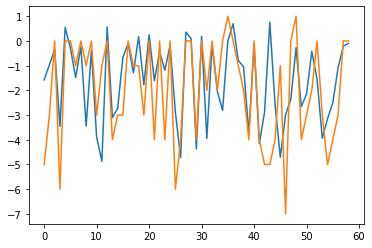

In [100]:
plt.plot(pred_y)
plt.plot(test_y)
plt.show()